<a href="https://colab.research.google.com/github/sunilsm7/numpy-demos/blob/main/Boolean_Arrays_and_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparisons, Masks, and Boolean Logic

Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks

In [1]:
import numpy as np
import pandas as pd

## Comparison Operators as ufuncs

NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type.

In [4]:
x = np.array([1, 2, 3, 4, 5])
print(x)

[1 2 3 4 5]


In [5]:
x < 3 # less than

array([ True,  True, False, False, False])

In [6]:
x > 3 # greater than

array([False, False, False,  True,  True])

In [7]:
x <= 3 # less than or equal

array([ True,  True,  True, False, False])

In [8]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [9]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [10]:
x == 3  # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write `x < 3`, internally NumPy uses `np.less(x, 3)`. A summary of the comparison operators and their equivalent ufunc is shown here:

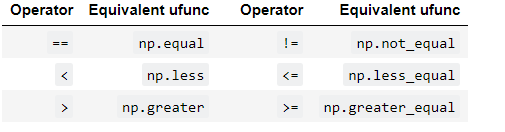

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. Here is a two-dimensional example:

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

### Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do. We'll work with `x`, the two-dimensional array we created earlier.

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


**Counting entries**

To count the number of `True` entries in a Boolean array, `np.count_nonzero` is useful:

In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than `6`. Another way to get at this information is to use `np.sum`; in this case, `False` is interpreted as `0`, and `True` is interpreted as `1`:

In [16]:
np.sum(x < 6)

8

The benefit of `sum()` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

This counts the number of values less than `6` in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) `np.any` or `np.all`:

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

`np.all` and `np.any` can be used along particular axes as well. For example:

In [24]:
# are all values in each row less than 4?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean Arrays as Masks

Use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our x array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [25]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


we can obtain a Boolean array for this condition easily, as we've already seen:

In [26]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation

In [27]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is True